plan of what we are about to do <br>
we have a lot of missing values and categorical features. So we want to deal somehow with missing values and transform categorical values <br>
as I get from kaggle notebooks we have 2 options to deal with missing values. First - just drop columns with more that 30% missing values and fill-na most frequent or mean or median in others (fasters way), or deal with each column with missing values in individual maner. We will try both of this methods. <br>
and for the categorical values we want to one hot encode them using pandas.get_dummies method <br>
to apply changes to all of our rows we need to combine data and perform our manipulations on combined df <br>
we also need to remember that we have two methods of dealing with missing values that will return different amount of columns

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# missing values handle - first aproach with dropping values
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


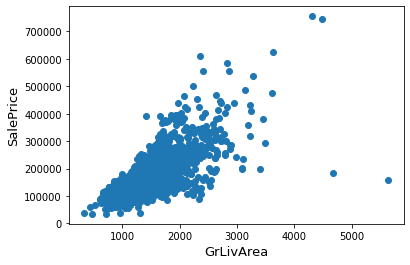

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [4]:
# we have two houses with really huge living area and they have relatively small sale price. We need to exclude them as they are clearly outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

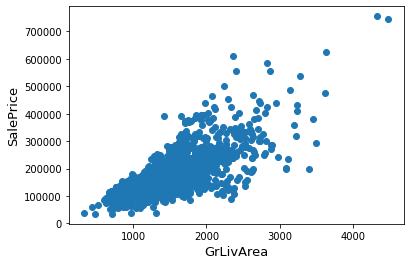

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [6]:
df_train['SalePrice'] = np.log1p(df_train["SalePrice"])

In [7]:

combined_data = pd.concat([df_train.drop(columns='SalePrice'), df_test])
combined_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
missing_vals_method = 2

if missing_vals_method == 1:
    # took it from here
    # https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
    # starting from In [14]:
    combined_data["PoolQC"] = combined_data["PoolQC"].fillna("None")
    combined_data["MiscFeature"] = combined_data["MiscFeature"].fillna("None")
    combined_data["Alley"] = combined_data["Alley"].fillna("None")
    combined_data["Fence"] = combined_data["Fence"].fillna("None")
    combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna("None")
    # interesting way to give missing values mean values of the Neighborhood
    combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        combined_data[col] = combined_data[col].fillna('None')
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        combined_data[col] = combined_data[col].fillna(0)
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        combined_data[col] = combined_data[col].fillna(0)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        combined_data[col] = combined_data[col].fillna('None')
    combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
    combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)
    combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])
    combined_data = combined_data.drop(['Utilities'], axis=1)
    combined_data["Functional"] = combined_data["Functional"].fillna("Typ")
    combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])
    combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])
    combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])
    combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])
    combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])
    combined_data['MSSubClass'] = combined_data['MSSubClass'].fillna("None")

    # Plus let's transform some values which are numerical but should be categorical
    combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)
    combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)
    combined_data['YrSold'] = combined_data['YrSold'].astype(str)
    combined_data['MoSold'] = combined_data['MoSold'].astype(str)

    # let's also add total SF
    combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']

    # let's get dummies for all cat values
    combined_data = pd.get_dummies(combined_data)

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_colnames = combined_data.select_dtypes(include=numerics).columns    

    obj_colnames = [x for x in combined_data.columns if x not in num_colnames]
    
elif missing_vals_method == 2:
    # set missing values threshold
    mis_prc_threshold = 10

    mis_data_df = combined_data.isnull().sum(axis=0).sort_values(ascending=False).reset_index()
    mis_data_df.columns = ['col_name', 'cnt_missing_vals']
    mis_data_df['mis_perc'] = mis_data_df['cnt_missing_vals'] / combined_data.shape[0]

    # columns to keep due to threshold
    cols_to_keep = list(mis_data_df[mis_data_df['mis_perc'] < (mis_prc_threshold/100)]['col_name'])

    mis_data_threshold_df = mis_data_df[mis_data_df['col_name'].isin(cols_to_keep)]

    # columns to keep due to threshold were we can still find missing values 
    cols_to_keep_with_missvals = mis_data_threshold_df[mis_data_threshold_df['mis_perc'] != 0]
    combined_data = combined_data[cols_to_keep].copy()  
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_colnames = combined_data.select_dtypes(include=numerics).columns    

    obj_colnames = [x for x in combined_data.columns if x not in num_colnames]

    from sklearn.impute import SimpleImputer

    obj_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='median')

    combined_data_num_imp = pd.DataFrame(num_imputer.fit_transform(combined_data[num_colnames]), columns=combined_data[num_colnames].columns)
    combined_data_obj_imp = pd.DataFrame(obj_imputer.fit_transform(combined_data[obj_colnames]), columns=combined_data[obj_colnames].columns)

    combined_data_dummies = pd.get_dummies(combined_data_obj_imp)

    combined_data = pd.concat([combined_data_num_imp, combined_data_dummies], axis=1)
    print('missing values in whole DF:', combined_data.isnull().sum().sum())

missing values in whole DF: 0


In [9]:
from scipy.stats import skew
# Check the skew of all numerical features
skewed_feats = combined_data[num_colnames].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head(10))

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in [x for x in skewed_features if x != 'Id']:
    combined_data[feat] = boxcox1p(combined_data[feat], lam)


Skew in numerical features: 

                    Skew
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101
BsmtHalfBath    3.929996
There are 36 skewed numerical features to Box Cox transform


In [10]:
combined_data = combined_data.merge(df_train[['Id', 'SalePrice']].copy(), on='Id', how='left')

In [11]:
df_train_tranf = combined_data[combined_data['SalePrice'].notnull()].copy()
df_test_tranf = combined_data[combined_data['SalePrice'].isnull()].drop(columns='SalePrice').copy()

In [12]:
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
XGBReg = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
linreg = LinearRegression()

In [13]:
X = df_train_tranf[[x for x in df_train_tranf.columns if x not in ['SalePrice', 'Id']]]
y = df_train_tranf['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [14]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [15]:
score = rmsle_cv(XGBReg)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(linreg)
print("LinReg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1207 (0.0072)

LinReg score: 353798573.6478 (224343395.9876)



In [16]:
XGBReg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
head_important_variables = 40

xgb_var_imp = pd.DataFrame.from_dict((XGBReg.get_booster().get_score(importance_type='weight')), orient='index').reset_index()
xgb_var_imp.columns = ['var_name', 'var_imp']
xgb_var_imp = xgb_var_imp.sort_values('var_imp', ascending=False)
list(xgb_var_imp.head(head_important_variables)['var_name'])

['GarageYrBlt',
 'BsmtUnfSF',
 'LotArea',
 'GarageArea',
 'BsmtFinSF1',
 'GrLivArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'MoSold',
 '1stFlrSF',
 'OpenPorchSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'TotRmsAbvGrd',
 'OverallQual',
 '2ndFlrSF',
 'GarageCars',
 'BsmtFullBath',
 'OverallCond',
 'Fireplaces',
 'EnclosedPorch',
 'BedroomAbvGr',
 'MSSubClass',
 'BsmtFinSF2',
 'GarageFinish_RFn',
 'Neighborhood_CollgCr',
 'ScreenPorch',
 'HalfBath',
 'LotShape_IR1',
 'LotConfig_Inside',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'HeatingQC_Ex',
 'LotConfig_Corner',
 'Exterior2nd_MetalSd',
 'HeatingQC_TA',
 'Functional_Maj1']

In [18]:
X = df_train_tranf[[x for x in df_train_tranf.columns if (x not in ['SalePrice', 'Id']) & (x in list(xgb_var_imp.head(head_important_variables)['var_name']))]]
y = df_train_tranf['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [19]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [20]:
score = rmsle_cv(XGBReg)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(linreg)
print("LinReg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1307 (0.0072)

LinReg score: 0.1302 (0.0066)



In [21]:
XGBReg = XGBReg.fit(X_train, y_train)
xgb_predictions = XGBReg.predict(X_test)

In [22]:
df_test_tranf['SalePrice'] = np.expm1(XGBReg.predict(df_test_tranf[[x for x in df_train_tranf.columns if (x not in ['SalePrice', 'Id']) & (x in list(xgb_var_imp.head(head_important_variables)['var_name']))]]))
df_test_tranf['Id'] = df_test_tranf['Id'].astype('int')
df_test_tranf[['Id', 'SalePrice']].set_index('Id').to_csv('after_kaggle_#8.csv')

In [23]:
df_test_tranf['Id']

1458    1461
1459    1462
1460    1463
1461    1464
1462    1465
        ... 
2912    2915
2913    2916
2914    2917
2915    2918
2916    2919
Name: Id, Length: 1459, dtype: int32